<a href="https://colab.research.google.com/github/shahidedu7/DL4CV/blob/main/Image_Classification_with_CIFAR10_Dataset_using_Tensorflow_Keras_%7C_DL4CV_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification with CIFAR10 Dataset using Tensorflow Keras
Please refer to our blog post for detailed explanantion -
[link text](https://www.binarystudy.com/2022/08/image-classification-with-cifar10-dataset-tensorflow-keras.html)


# Prerequisites
 Followings are the prerequisites for this project.



*   Language: Python 3 or Higher
*   Frameworks: TensorFlow
*   Libraries: NumPy, Matplotlib and scikit-learn





### STEP 1
Import Required Libraries and frameworks and modules

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np


### STEP 2
Load CIFAR 10 Dataset and Normalize it.

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### STEP 3
Define a Convolutional Neural Network (CNN)

In [ ]:
# number of classes
y_train = y_train.reshape(-1,)
K = len(set(y_train))

# calculate total number of classes
# for output layer
print("number of classes:", K)

# Build the model using the functional API
# input layer
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))

# Hidden layer
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.2))

# last hidden layer i.e.. output layer
model.add(layers.Dense(K, activation='softmax'))


# model description
model.summary()


number of classes: 10
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                  

### STEP 4
Compile The Model

In [ ]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

### STEP 4
Train The Model on Training Data.

In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 42s 21ms/step - loss: 1.3265 - accuracy: 0.5468 - val_loss: 1.0588 - val_accuracy: 0.6208
Epoch 2/20
1563/1563 [==============================] - 32s 21ms/step - loss: 0.8544 - accuracy: 0.7032 - val_loss: 0.8160 - val_accuracy: 0.7154
Epoch 3/20
1563/1563 [==============================] - 30s 19ms/step - loss: 0.6999 - accuracy: 0.7583 - val_loss: 0.7447 - val_accuracy: 0.7468
Epoch 4/20
1563/1563 [==============================] - 31s 20ms/step - loss: 0.5927 - accuracy: 0.7961 - val_loss: 0.8862 - val_accuracy: 0.7116
Epoch 5/20
1563/1563 [==============================] - 32s 20ms/step - loss: 0.5013 - accuracy: 0.8284 - val_loss: 0.6328 - val_accuracy: 0.7899
Epoch 6/20
1563/1563 [==============================] - 32s 21ms/step - loss: 0.4335 - accuracy: 0.8512 - val_loss: 0.7026 - val_accuracy: 0.7836
Epoch 7/20
1563/1563 [==============================] - 32s 21ms/step - loss: 0.3595 - accuracy: 0.8761 - val_loss: 0.6304 -

### STEP 5
Test/ Evaluate The Network/ Model on Test Data

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      1000
           1       0.93      0.93      0.93      1000
           2       0.77      0.76      0.77      1000
           3       0.65      0.73      0.69      1000
           4       0.84      0.80      0.82      1000
           5       0.81      0.75      0.78      1000
           6       0.90      0.85      0.87      1000
           7       0.89      0.85      0.87      1000
           8       0.86      0.93      0.89      1000
           9       0.92      0.89      0.90      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [ ]:
print("confusion matrix:\n", confusion_matrix(y_test, y_pred_classes))

confusion matrix:
 [[879   4  31  12   4   4   3   6  44  13]
 [  9 934   2   2   1   1   2   1  18  30]
 [ 48   7 763  53  43  33  26  16   8   3]
 [ 19   6  49 731  33  80  33  23  20   6]
 [ 18   3  55  54 796  18  17  33   6   0]
 [  9   1  27 153  25 747   7  23   4   4]
 [ 11   3  30  50  19  16 846   3  17   5]
 [ 10   1  25  49  22  26   1 855   6   5]
 [ 37  10   7   5   2   1   2   0 926  10]
 [ 21  40   5  16   1   1   0   0  29 887]]


313/313 - 2s - loss: 0.7446 - accuracy: 0.8364 - 2s/epoch - 7ms/step


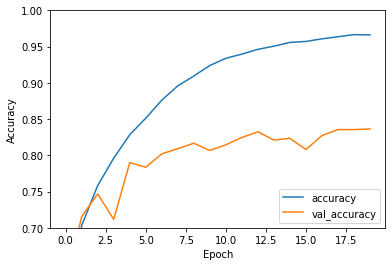

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [ ]:
# Fit with data augmentation
# Note: if you run this AFTER calling
# the previous model.fit()
# it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

r = model.fit(train_generator, validation_data=(X_test, y_test),
			steps_per_epoch=steps_per_epoch, epochs=10)


Epoch 1/10
1562/1562 [==============================] - 54s 34ms/step - loss: 0.5492 - accuracy: 0.8251 - val_loss: 0.4824 - val_accuracy: 0.8407
Epoch 2/10
1562/1562 [==============================] - 53s 34ms/step - loss: 0.4429 - accuracy: 0.8531 - val_loss: 0.4806 - val_accuracy: 0.8434
Epoch 3/10
1562/1562 [==============================] - 53s 34ms/step - loss: 0.4034 - accuracy: 0.8640 - val_loss: 0.4792 - val_accuracy: 0.8449
Epoch 4/10
1562/1562 [==============================] - 52s 34ms/step - loss: 0.3836 - accuracy: 0.8713 - val_loss: 0.4602 - val_accuracy: 0.8543
Epoch 5/10
1562/1562 [==============================] - 53s 34ms/step - loss: 0.3690 - accuracy: 0.8771 - val_loss: 0.4615 - val_accuracy: 0.8511
Epoch 6/10
1562/1562 [==============================] - 53s 34ms/step - loss: 0.3539 - accuracy: 0.8803 - val_loss: 0.4687 - val_accuracy: 0.8557
Epoch 7/10
1562/1562 [==============================] - 54s 34ms/step - loss: 0.3353 - accuracy: 0.8852 - val_loss: 0.4260 -

In [ ]:
y_pred = model.predict(X_test)
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:10]

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1]

[[3.9521787e-08 2.3015059e-09 4.6826610e-08 ... 1.2385266e-07
  9.0896992e-07 1.3537279e-07]
 [1.9760818e-19 1.0568182e-09 1.0820759e-28 ... 4.4578180e-30
  1.0000000e+00 1.6756009e-20]
 [2.0620810e-05 4.2299676e-04 4.2718745e-11 ... 3.5415070e-08
  9.9945992e-01 1.6858961e-06]
 ...
 [8.3391088e-15 6.5921789e-14 1.1535729e-08 ... 4.8390071e-08
  1.4339907e-13 4.2596921e-13]
 [9.9146479e-01 9.9901354e-04 1.1814365e-03 ... 4.7673228e-05
  5.9958766e-03 1.1494376e-05]
 [1.4169767e-16 7.0683491e-16 2.0917616e-15 ... 1.0000000e+00
  3.8461754e-17 8.3701241e-14]]
[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 2, 0, 9, 3, 2, 3, 0, 9, 6, 6, 5, 4, 5, 9, 8, 4, 1, 9, 5, 4, 6, 3, 6, 0, 9, 3, 9, 7, 6, 9, 8, 9, 5, 8, 8, 7, 3, 5, 6, 7, 5, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 0, 3, 5, 8, 8, 1, 1, 7, 2, 7, 3, 8, 8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 7, 0, 2, 2, 1, 3, 0, 4, 6, 7, 8, 3, 1, 2, 8, 0, 8, 3, 0, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 8, 6, 5, 6, 3, 8, 

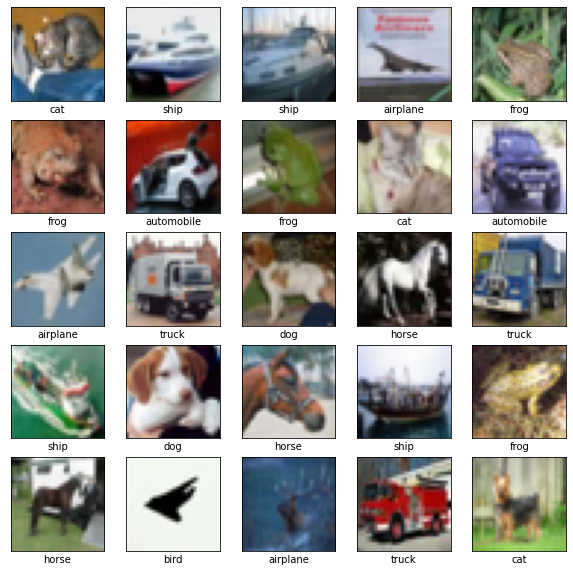

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


y_pred = model.predict(X_test)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
print(y_classes)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    # print(y_train[i])
    # plt.xlabel("True class:{} "'\n Predicted class: {}' ,labels[y_train[i]], )
    plt.xlabel(labels[y_classes[i]])
plt.show()

In [ ]:
# number of classes
y_train = y_train.reshape(-1,)
K = len(set(y_train))

# calculate total number of classes
# for output layer
print("number of classes:", K)

# Build the model using the functional API
# input layer
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))

# Hidden layer
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.2))

# last hidden layer i.e.. output layer
model.add(layers.Dense(K, activation='softmax'))


# model description
model.summary()


number of classes: 10
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                

In [ ]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1563/1563 [==============================] - 37s 23ms/step - loss: 1.3656 - accuracy: 0.5303 - val_loss: 1.0650 - val_accuracy: 0.6319
Epoch 2/20
1563/1563 [==============================] - 40s 26ms/step - loss: 0.8972 - accuracy: 0.6876 - val_loss: 1.0336 - val_accuracy: 0.6607
Epoch 3/20
1563/1563 [==============================] - 35s 22ms/step - loss: 0.7555 - accuracy: 0.7381 - val_loss: 0.7092 - val_accuracy: 0.7552
Epoch 4/20
1563/1563 [==============================] - 34s 22ms/step - loss: 0.6557 - accuracy: 0.7741 - val_loss: 0.6600 - val_accuracy: 0.7775
Epoch 5/20
1563/1563 [==============================] - 33s 21ms/step - loss: 0.5810 - accuracy: 0.7996 - val_loss: 0.6218 - val_accuracy: 0.7910
Epoch 6/20
1563/1563 [==============================] - 32s 21ms/step - loss: 0.5172 - accuracy: 0.8227 - val_loss: 0.6187 - val_accuracy: 0.7977
Epoch 7/20
1563/1563 [==============================] - 32s 20ms/step - loss: 0.4522 - accuracy: 0.8434 - val_loss: 0.7807 -

313/313 - 2s - loss: 0.6494 - accuracy: 0.8370 - 2s/epoch - 7ms/step


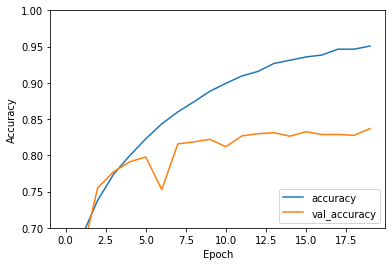

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
